## <center> **Tratamiento del dataset </center>**

Se cargan las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Se carga dataset

In [2]:
df = pd.read_csv('./winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### **Descripcion del dataset**
Los datos utilizados consisten en la puntuación que distintos enólogos proporcionaron a diferentes tipos de vinos con variadas características, las cuales se definen a continuación:

* **Country (país) :** El país de donde es el vino
* **Description :** descripción 
* **Designation (designacion) :** El viñedo dentro de la bodega de donde provienen las uvas que elaboraron el vino
* **Points (puntos) :** La cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100
* **price (precio) :** El costo de una botella de vino.
* **province (provincia) :** La provincia o estado de donde proviene el vino
* **region_1 (región 1) :** El área vitivinícola en una provincia o estado (es decir, Napa)
* **region_2 :** A veces hay regiones más específicas especificadas dentro de un área de cultivo de vino
* **taster_name :** nombre del catador
* **title (titulo) :**  El título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
* **variety (variedad) :** El tipo de uvas utilizadas para elaborar el vino
* **winery (lagar) :** la bodega que hizo el vino. 

En primer lugar, se observa si los registros poseen la misma cantidad de datos para cada característica, de no ser así, se está en presencia de valores nulos o "nan", los cuales deben ser tratados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Antes de tratar los NAN, se eliminan las características que no serán utilizadas para realizar la clasificación de los vinos.

In [4]:
dfnew = df.drop(['Unnamed: 0','designation','description','region_1','region_2','taster_name','taster_twitter_handle','title'],axis=1)
dfnew.head()

,country,points,price,province,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Riesling,St. Julian
4,US,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


Ahora se eliminan los NaN que permanecieron en el dataset hasta este momento.

In [5]:
dfnew = dfnew.dropna(how = 'any')

se grafican todos los países que se encuentran en la data, visualizando la cantidad de registros que hay de cada uno.

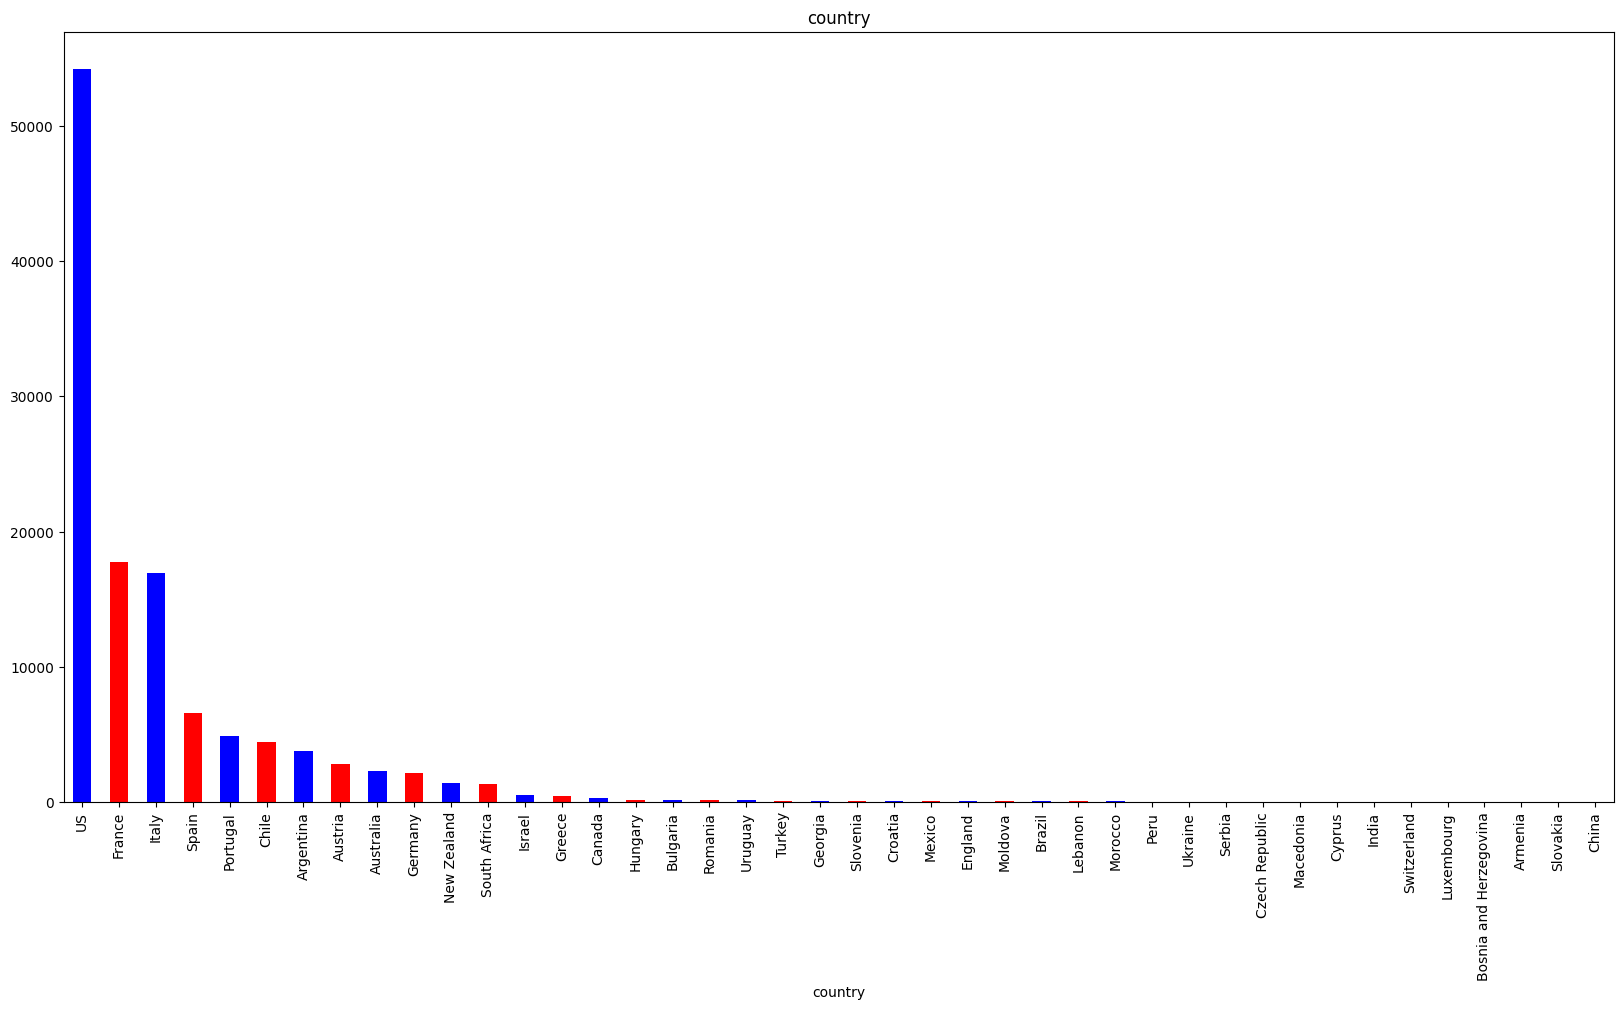

In [6]:
plt.rcParams['figure.figsize']=(20,10)
dfnew.country.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('country')
plt.show()

Se determina la cantidad exacta de registros que posee cada país, con el fin de determinar si existen algunos que no sea significativos.

In [7]:
print(dfnew.country.value_counts()) 

country
US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


Se eliminan todos los países que posean menos de 1293 registros.

In [8]:
dfnew = dfnew.drop(dfnew[dfnew['country']=='Slovakia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='China'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Bosnia and Herzegovina'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Armenia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Luxembourg'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Switzerland'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='India'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Cyprus'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Czech Republic'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Serbia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Macedonia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Ukraine'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Peru'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Morocco'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Lebanon'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Brazil'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Moldova'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='England'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Mexico'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Croatia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Slovenia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Georgia'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Turkey'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Uruguay'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Romania'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Bulgaria'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Hungary'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Canada'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Greece'].index)
dfnew = dfnew.drop(dfnew[dfnew['country']=='Israel'].index)

Balanceo de dataframe por medio del submuestreo de datos (RandomUnderSampler).

In [9]:
# importacion del metodo de balanceo
from imblearn.under_sampling import RandomUnderSampler

In [10]:
rus = RandomUnderSampler()


In [11]:
# balanceo de X e Y del dataframe
datarus, targetRus = rus.fit_resample(dfnew.drop(['country'],axis=1),dfnew['country'])

Se transforman los arreglos balanceados de X e Y en dataframes

In [12]:
# conversion de arrays en dataframe
datanew = pd.DataFrame(datarus)
targetnew = pd.DataFrame(targetRus)

Incorporación de los nombres de las columnas a los nuevos dataframes

In [13]:
datanew.columns = ['points', 'price', 'province', 'variety', 'winery']
targetnew.columns = ['country']

finalmente, se concatenan los dataframe balanceados, resultando uno con las entradas y la salida totalmente balanceadas

In [14]:
dfnew = pd.merge(datanew,targetnew, right_index=True, left_index=True)

In [15]:
dfnew

,points,price,province,variety,winery,country
127289,92,40.0,Mendoza Province,Cabernet Sauvignon,Las Vertientes,Argentina
38039,90,75.0,Mendoza Province,Cabernet Franc,Serca,Argentina
119800,90,25.0,Mendoza Province,Cabernet Sauvignon,Kaiken,Argentina
46607,85,11.0,Mendoza Province,Malbec,Finca Sophenia,Argentina
63945,88,15.0,Other,Torrontés,Trapiche,Argentina
...,...,...,...,...,...,...
118392,83,20.0,California,Chardonnay,Taft Street,US
69758,90,49.0,California,Pinot Noir,MacPhail,US
31948,93,65.0,California,Cabernet Sauvignon,Merryvale,US
4975,90,28.0,California,Syrah,Transcendence,US


In [16]:
print(dfnew.country.value_counts())

country
Argentina       1293
Australia       1293
Austria         1293
Chile           1293
France          1293
Germany         1293
Italy           1293
New Zealand     1293
Portugal        1293
South Africa    1293
Spain           1293
US              1293
Name: count, dtype: int64


se observa la información con que queda el dataframe

In [17]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15516 entries, 127289 to 31809
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   points    15516 non-null  int64  
 1   price     15516 non-null  float64
 2   province  15516 non-null  object 
 3   variety   15516 non-null  object 
 4   winery    15516 non-null  object 
 5   country   15516 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


se consulta la cantidad de valores nulos existentes en cada columna.

In [18]:
dfnew.isna().sum()

points      0
price       0
province    0
variety     0
winery      0
country     0
dtype: int64

se convierten todas las variables categoricas a numericas.

In [19]:
## conversion de variables categoricas a numericas
dfnew.country = dfnew.country.astype('category').cat.codes+1 
dfnew.province = dfnew.province.astype('category').cat.codes+1 
dfnew.variety = dfnew.variety.astype('category').cat.codes+1 
dfnew.winery = dfnew.winery.astype('category').cat.codes+1 
dfnew.head()

,points,price,province,variety,winery,country
127289,92,40.0,108,42,2967,1
38039,90,75.0,108,37,4462,1
119800,90,25.0,108,42,2761,1
46607,85,11.0,108,141,2155,1
63945,88,15.0,133,331,4926,1


In [20]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15516 entries, 127289 to 31809
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   points    15516 non-null  int64  
 1   price     15516 non-null  float64
 2   province  15516 non-null  int16  
 3   variety   15516 non-null  int16  
 4   winery    15516 non-null  int16  
 5   country   15516 non-null  int8   
dtypes: float64(1), int16(3), int64(1), int8(1)
memory usage: 985.8 KB


Para proceder con los algoritmos de clasificacion, se separa el dataset trabajado entre entradas y salida, en este caso, se decidio utilizar como entrada el precio del vino, los puntos que se otorgaron, la variedad de uva, la provincia de donde viene y la bodega que lo realizo.

In [21]:
X = dfnew[['points','price', 'province','variety','winery']].values
Y = dfnew['country'].values

Para los primeros algoritmos implementados, se separa el dataframe en un conjunto de test, equivalente al 25% de los datos, y el otro 75% se utiliza para el entrenamiento de ellos.

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0) 

## <center> **Tree Decision**

### **Descripción del árbol de decisión**




El árbol de decisión es un método de aprendizaje supervisado no paramétrico que se utiliza para clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo aprendiendo reglas de decisión simples inferidas de las características de los datos.

**Parámetros principales**\
**criterion:{“gini”, “entropy”}, default=”gini”** La función para medir la calidad de una división. Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información.

**splitter:{“best”, “random”}, default=”best”** La estrategia utilizada para elegir la división en cada nodo. Las estrategias admitidas son "best" para elegir la mejor división y "random" para elegir la mejor división aleatoria.

**max_depth:int, default=None** forma (n_muestras,) o (n_muestras, n_salidas)\N
Objetivo relativo a X para la clasificación o la regresión; Ninguno para el aprendizaje no supervisado.

**min_samples_split:int or float, default=2**El número mínimo de muestras necesarias para dividir un nodo interno:

Si es int, entonces considere min_samples_split como el número mínimo.

Si es flotante, min_samples_split es una fracción y ceil (min_samples_split * n_samples) es el número mínimo de muestras para cada división.

**min_samples_leaf:int or float, default=1**-El número mínimo de muestras necesarias para estar en un nodo hoja. Un punto de división a cualquier profundidad solo se considerará si deja al menos muestras de entrenamiento min_samples_leaf en cada una de las ramas izquierda y derecha. Esto puede tener el efecto de suavizar el modelo, especialmente en regresión.

Si es int, entonces considere min_samples_leaf como el número mínimo.

Si es flotante, min_samples_leaf es una fracción y ceil (min_samples_leaf * n_samples) es el número mínimo de muestras para cada nodo.

**El resto se puede encontrar en:**\
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### **Sintonización de parámetros del clasificador**
Como se mencionó anteriormente, existen distintos parámetros del algoritmo que deben ser configurados, para ello se realizan distintos métodos y es necesario cargar las siguientes librerías.

In [23]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

Se observan las curvas de aprendizaje del algoritmo ante diferentes valores para la cantidad de nodos (max_depth)

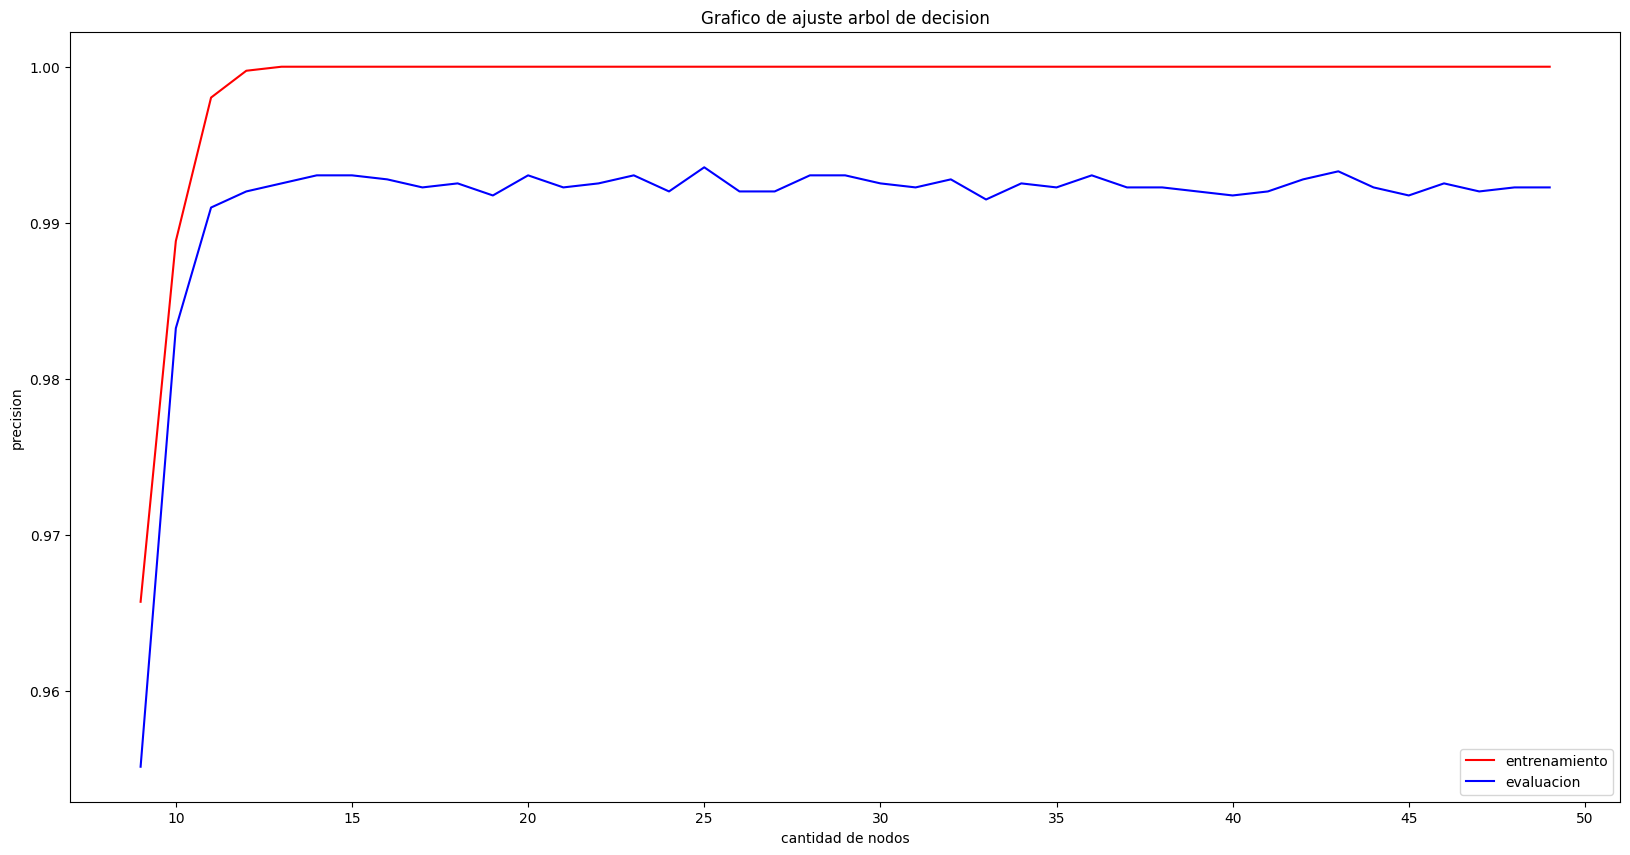

In [24]:
train_prec = []
eval_prec = []
max_deep_list = list(range(9, 50))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(X_train, Y_train)
    train_prec.append(arbol3.score(X_train, Y_train))
    eval_prec.append(arbol3.score(X_test, Y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cantidad de nodos')
plt.show()

Sintonización de hiperparametros utilizando GridSearchCV

In [25]:
parameters = {'max_depth':range(9,23)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters,cv=10,scoring='accuracy')
clf.fit(X=X_test, y=Y_test)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.974221476331282 {'max_depth': 15}


Aplicando este parametro y desarrollando el entrenamiento del algoritmo.

In [26]:
arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth=17)
arbol = arbol.fit(X_train, Y_train)

Test del algoritmo entrenado

In [27]:
arbol_accuracy = arbol.score(X_test, Y_test)
print('Accuracy: ', arbol_accuracy)

Accuracy:  0.991492652745553


## <center> **SVM**

Una máquina de vectores de soporte (SVM) es un algoritmo de aprendizaje supervisado que funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo. Se detecta un separador entre las categorías y los datos se transforman de forma que el separador se puede extraer como un hiperplano. Tras ello, las características de los nuevos datos se pueden utilizar para predecir el grupo al que pertenece el nuevo registro.

In [28]:
from sklearn.svm import SVC

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

**main Parameters**\
**C:float, default=1.0** Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización de 12 al cuadrado.

**kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’** Especifica el tipo de kernel que se utilizará en el algoritmo. Debe ser "lineal", "poli", "rbf", "sigmoide", "precalculado" o invocable. Si no se proporciona ninguno, se utilizará "rbf". Si se proporciona un invocable, se utiliza para calcular previamente la matriz del núcleo a partir de matrices de datos; esa matriz debe ser una matriz de forma (n_samples, n_samples).

**degree:int, default=3**-Grado de la función del núcleo polinomial ("poli"). Ignorado por todos los demás núcleos.

**gamma:{‘scale’, ‘auto’} or float, default=’scale’**-Coeficiente de kernel para "rbf", "poli" y "sigmoide".

si se pasa gamma = 'scale' (predeterminado), entonces usa 1 / (n_features * X.var ()) como valor de gamma,

si es "auto", utiliza 1 / n_features.

**el resto se puede encontrar en:**\
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

Sintonizacion de hiperparámetros utilizando GridSearchCV

In [37]:
## busqueda del mejor parametro dentro del rango establecido usando GridSearchCV

svm=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2, 1e-3, 1e-4],'C': [1, 10, 100]},
              {'kernel': ['linear'], 'gamma': [1, 1e-3, 1e-4], 'C': [1, 10, 100]},
             {'kernel': ['sigmoid'], 'gamma': [1, 1e-3, 1e-4], 'C': [1, 10, 100]}]

grid=GridSearchCV(svm,param_grid,cv=10,scoring='accuracy', n_jobs=4)
print("Tuning hyper-parameters")
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(np.round(grid.best_score_,3))

Tuning hyper-parameters


KeyboardInterrupt: 

Entrenamiento y testeo del algoritmo

In [30]:
svm=SVC(C=100,gamma=0.001,kernel='rbf')
svm.fit(X_train,Y_train)

print('Precisión del clasificador SVM en el conjunto de entrenamiento: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Precisión del clasificador SVM en el conjunto de prueba: {:.2f}'
     .format(svm.score(X_test, Y_test)))

Precisión del clasificador SVM en el conjunto de entrenamiento: 1.00
Precisión del clasificador SVM en el conjunto de prueba: 0.75


## <center> **clasificacion por k vecinos mas cercanos**

K vecinos cercanos o Knn (por sus siglas en ingles), es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.
A diferencia de K-means, que es un algoritmo no supervisado y donde la “K” significa la cantidad de “grupos” (clusters) que deseamos clasificar, en K-Nearest Neighbor la “K” significa la cantidad de “puntos vecinos” que tenemos en cuenta en las cercanías para clasificar los “n” grupos -que ya se conocen de antemano, pues es un algoritmo supervisado-.

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

**main Parameters**\
**n_neighbors:int, default=5** Número de vecinos que se utilizarán de forma predeterminada para las consultas de vecinos.

**weights:{‘uniform’, ‘distance’} or callable, default=’uniform’**función de peso utilizada en la predicción. Valores posibles:
"Uniforme": pesos uniformes. Todos los puntos de cada vecindario se ponderan por igual.
"Distancia": puntos de peso por la inversa de su distancia. en este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos que están más lejos.
[invocable]: un usuario-
función definida que acepta una matriz de distancias y devuelve una matriz de la misma forma que contiene los pesos.

**algorithm:{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’**-Algoritmo utilizado para calcular los vecinos más cercanos:
"Ball_tree" utilizará BallTree
"Kd_tree" utilizará KDTree
"Bruto" utilizará una búsqueda de fuerza bruta.
"Auto" intentará decidir el algoritmo más apropiado en función de los valores pasados ​​para ajustar el método.
Nota: el ajuste en una entrada escasa anulará la configuración de este parámetro, utilizando la fuerza bruta.

**p:int, default=2**- Parámetro de potencia para la métrica de Minkowski. Cuando p = 1, esto equivale a usar manhattan_distance (l1) y euclidean_distance (l2) para p = 2. Para p arbitrario, se usa minkowski_distance (l_p).

**metricstr or callable, default=’minkowski’**-la métrica de distancia que se utilizará para el árbol. La métrica predeterminada es minkowski y con p = 2 es equivalente a la métrica euclidiana estándar. Consulte la documentación de DistanceMetric para obtener una lista de métricas disponibles. Si la métrica está “calculada previamente”, se supone que X es una matriz de distancia y debe ser cuadrada durante el ajuste. X puede ser un gráfico disperso,
en cuyo caso sólo los elementos "distintos de cero" pueden considerarse vecinos.


**el resto se puede encontrar en:**\
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier




### **Sintonizacion de parametros del clasificador**

Como es posible observar, segun lo comentado anteriormente, existen distintos parámetros del algoritmo que deben ser configurados, para ello se realizan distintos métodos y es necesario cargar la siguiente librerías.

In [31]:
# se importa la libreria de Knn
from sklearn.neighbors import KNeighborsClassifier

Se realiza la gráfica de las curvas de aprendizaje de test y entrenamiento vs el número de vecinos cercanos considerados para el cálculo de las distancias.

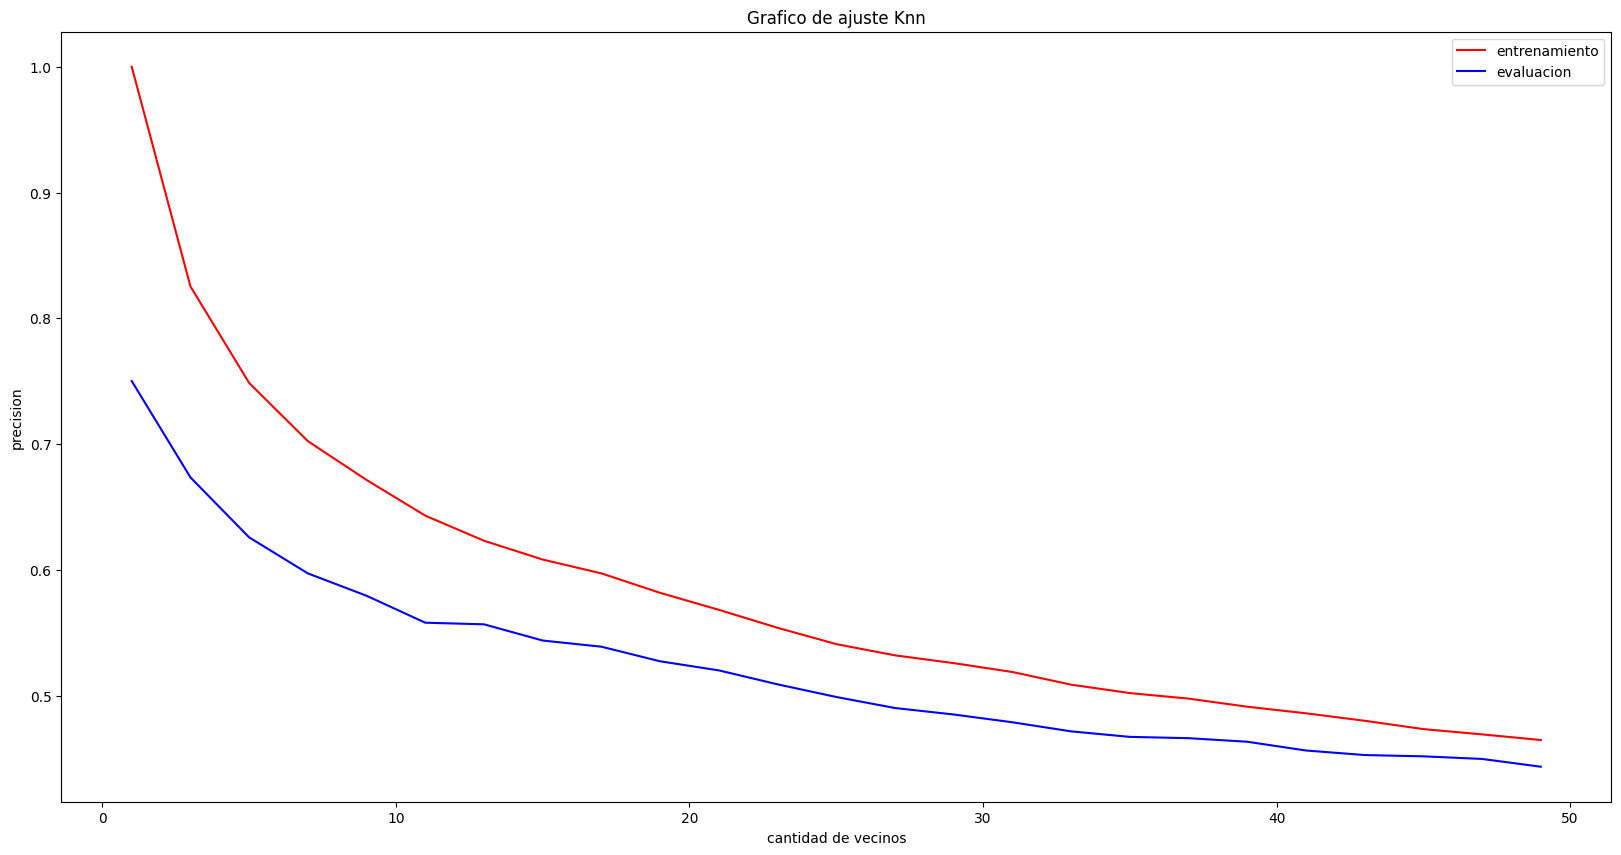

In [32]:
# por visualizacion de curvas de ajuste
train_prec = []
eval_prec = []
k_range = np.arange(1,50,2)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    train_prec.append(knn.score(X_train, Y_train))
    eval_prec.append(knn.score(X_test, Y_test))
# graficar los resultados.
plt.plot(k_range, train_prec, color='r', label='entrenamiento')
plt.plot(k_range, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste Knn')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cantidad de vecinos')
plt.show()

Se utiliza validación cruzada típica, para determinar el mejor valor que puede tomar el parámetro n_neighbors, con tal de generar un buen aprendizaje por parte del algoritmo.

In [33]:
## usando validacion cruzada tipica
from sklearn.model_selection import cross_val_score
neighbors = list(range(1,20,2))
cv_scores = []

for k in neighbors:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1- x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('el valor optimo de k es: ', optimal_k)

el valor optimo de k es:  1


Se grafica la curva del error vs el valor de los k vecinos considerados.

AttributeError: 'Text' object has no property 'Fontsize'

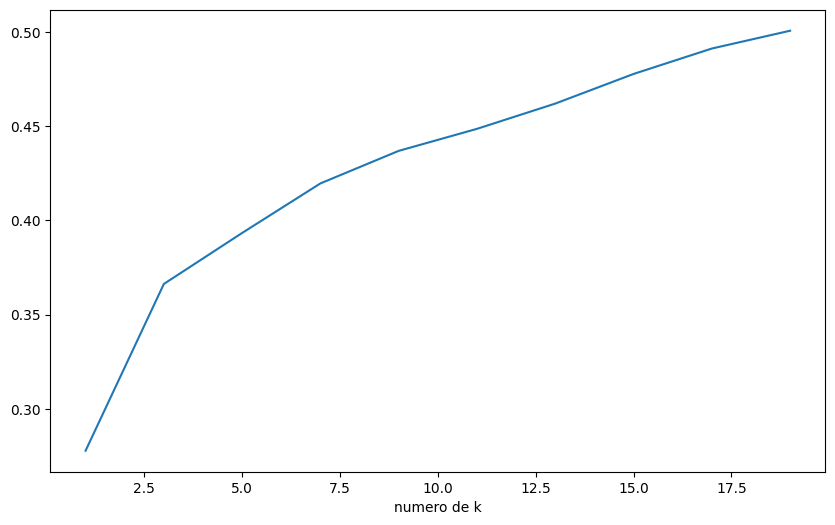

In [35]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
plt.xlabel('numero de k',Fontsize = '14')
plt.ylabel('error %',Fontsize = '14')
plt.title('variacion del error en funcion del valor de k',Fontsize = '16')
plt.grid()

se sintonizan los hiperparametros con GridSearchCV, para determinar el mejor conjunto de parametros a configurar, los que indican la  cantidad de vecinos, la metrica para la medicion de la distancia entre ellos y el peso.

In [36]:
parameters = {'n_neighbors':range(1,15), 'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'metric':['euclidean','manhattan']}
clf = GridSearchCV(knn, parameters, scoring='accuracy')
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7704745354474664 {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


definiendo los parámetros con los valores arrojados por el sintonizador para desarrollar el entrenamiento del algoritmo, se obtienen los siguientes resultados.

In [38]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='manhattan',weights = 'distance') 
knn.fit(X_train, Y_train)
print('Precisión del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Precisión del clasificador K-NN en el conjunto de prueba: {:.2f}'
     .format(knn.score(X_test, Y_test)))

Precisión del clasificador K-NN en el conjunto de entrenamiento: 1.00
Precisión del clasificador K-NN en el conjunto de prueba: 0.79


## <center> **Red neuronal final**

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
mlp = MLPClassifier()

Para un rango menor de neuronas de 10 a 100 se probaron diferentes activaciones para las capas, determinando que la mejor opcion es utilizar la de tipo logistic, buscando generar una mejor precision se probo con un rango de 10 a 256 neuronas

In [41]:
parameters = {'hidden_layer_sizes':range(10,256,20), 'activation':['logistic']} #,'identity','tanh','relu' 'solver':['lbfgs','sgd','adam'],'learning_rate':['constant','invscaling','adaptive']}
clf = GridSearchCV(mlp, parameters, scoring='accuracy')
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by use

In [ ]:
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes=250, random_state = 0)
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test)

## <center>**Prueba con keras**

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, BatchNormalization,Dropout
from keras.losses import sparse_categorical_crossentropy

In [ ]:
X = dfnew[['points','price', 'province','variety','winery']].values
Y = dfnew['country'].values

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X= min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .1) # 10% del dataset en test 90% entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2) # (del 90%), 20% de validacion, 80% de entrenamiento

In [ ]:
model = Sequential()
model.add(Dense(20736, input_dim=5, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1728, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(144, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='tanh'))
model.add(Dropout(0.25))

In [ ]:
# Compila el modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
# Ajusta el modelo
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val,y_val)) # entrenamiento

# <center> **Conclusiones**

Observación de las correlaciones de las columnas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
correlation_mat = dfnew.astype('float').corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Debido a la baja correlación entre las características utilizadas para la clasificación de países, se obtienen precisiones deficientes en la mayoría de los algoritmos implementados, sin embargo, el Tree Desicion presenta un desempeño sumamente bueno.

Es importante desarrollar un preprocesamiento de los datos que se están utilizando, dado que el dataset puede presentar registros con valores nulos, además, pueden  estar muy desbalanceadas, lo que perjudica el entrenamiento de diferentes algoritmos.

A modo de comentario, la red neuronal implementada por Keras, no demostró un buen comportamiento al ser entrenada, a pesar de realizar una significativa cantidad de cambios, al igual que al usar TensorFlow, sin embargo, solo nos fue posible obtener algo más razonable, con sklearn, obteniendo una precisión mayor.
